In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [71]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
data.shape

(10000, 14)

In [73]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
lable_enc = LabelEncoder()
data['Gender'] = lable_enc.fit_transform(data['Gender'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [76]:
onehot_enc = OneHotEncoder(drop='first')
encoded_data = onehot_enc.fit_transform(data[['Geography']]).toarray()
encoded_data_df = pd.DataFrame(encoded_data, columns=onehot_enc.get_feature_names_out(['Geography']))
encoded_data_df.head()

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


In [77]:
data = pd.concat([data.drop(columns=['Geography']), encoded_data_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


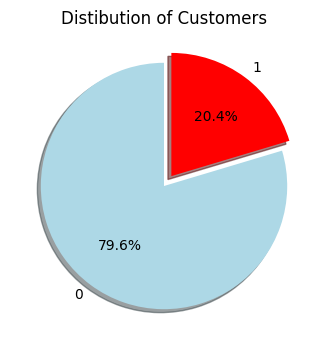

In [78]:
y_cnt = data['Exited'].value_counts()

plt.figure(figsize=(6,4))

plt.pie(y_cnt, labels=y_cnt.index, autopct="%1.1f%%" ,startangle=90, colors=['lightblue', 'red'], explode=(0,0.1) ,shadow=True)

plt.title("Distibution of Customers")
plt.show()

In [79]:
x = data.drop(columns=['Exited'], axis=1)
y = data[['Exited']]

In [80]:
x_tarin, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [81]:
model = DecisionTreeClassifier()
model.fit(x_tarin, y_train)

DecisionTreeClassifier()

In [82]:
model.score(x_test, y_test)

0.809

In [83]:
confusion_matrix(y_test, model.predict(x_test))

array([[2110,  306],
       [ 267,  317]])

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=155)

In [85]:
model2.fit(x_tarin, y_train)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=155)

In [86]:
model2.score(x_test, y_test)

0.867

In [87]:
pred = model2.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
confusion_matrix(y_test, pred)

array([[2331,   85],
       [ 314,  270]])